#### Importing external packages

In [1]:
%load_ext autoreload 

%autoreload 2


import numpy as np
import pandas as pd
import sys
from collections import Counter
from keras import layers
import keras
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Resizing
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

#### Importing internal packages

In [2]:
# Add a directory path to sys.path
sys.path.append('/Users/niknmirosh/Code/Yassinoko/dynamic-players-insights/data_processing/')

In [3]:
from get_images import get_players_images_cropped
from class_preprocessing import preprocessing_classes
from image_preprocessing import processing_images

#### Uploading data

In [4]:
data = get_players_images_cropped()

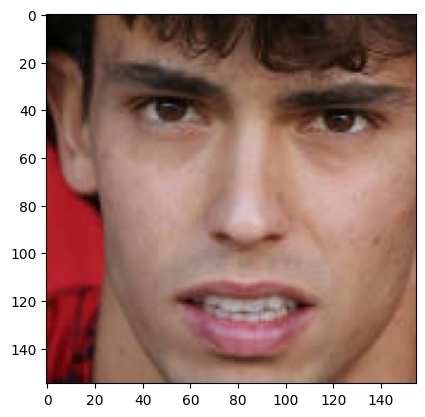

In [5]:
plt.imshow(data['image'][0])

In [6]:
# data['name'] = data['name'][:20]
# data['image'] = data['image'][:20]

#### Preprocessing data

In [17]:
X, y = processing_images(data)
# X, y = data['image'], data['name']

3093


100%|███████████████████████████████████████████████████████| 3093/3093 [00:00<00:00, 4502.87it/s]


(3093, 129, 129, 3)


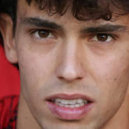

In [19]:
X[0]

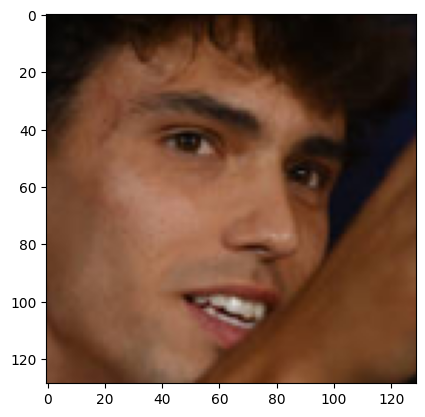

In [25]:
plt.imshow(X[5,:,:,:])

In [26]:
y = preprocessing_classes(y)

In [27]:
y.shape

(3093, 151)

#### Building augmentation pipeline

In [ ]:
# Compute most common shape to set as an input shape
def most_common(lst):
    counter = Counter(lst)
    most_common_item = max(counter, key=counter.get)
    return most_common_item

shapes = [img.shape for img in data['image']]
common = most_common(shapes)

In [ ]:
img_height = common[0]
img_width = common[1]

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip(input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1)
  ]
)

#### Initializing the model

In [43]:
def initialize_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(129, 129, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(y.shape[-1], name="outputs"))
    
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

#### Splitting the data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [31]:
X_train.shape

(2165, 129, 129, 3)

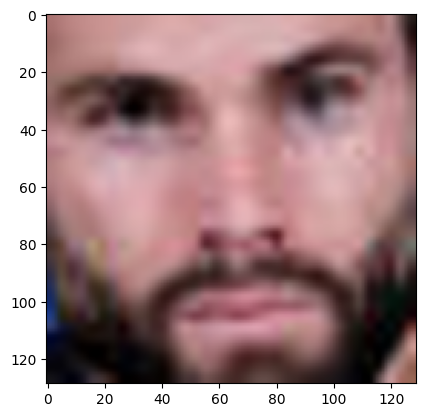

In [32]:
plt.imshow(X_train[0,:,:,:])

#### Fitting the model

In [45]:
model = initialize_model()

es = EarlyStopping(monitor='accuracy', patience=5)

history = model.fit(X_train, y_train, 
                    epochs=20, batch_size=16, 
                    verbose=1, callbacks=[es], 
                    validation_data=(X_test, y_test))

Epoch 1/20
136/136 [==============================] - 5s 32ms/step - loss: 8.4917 - accuracy: 0.0037 - val_loss: 8.4709 - val_accuracy: 0.0032
Epoch 2/20
136/136 [==============================] - 4s 32ms/step - loss: 8.3483 - accuracy: 0.0018 - val_loss: 8.0950 - val_accuracy: 0.0032
Epoch 3/20
136/136 [==============================] - 4s 32ms/step - loss: 8.3051 - accuracy: 0.0018 - val_loss: 7.7471 - val_accuracy: 0.0032
Epoch 4/20
136/136 [==============================] - 4s 32ms/step - loss: 8.2795 - accuracy: 0.0018 - val_loss: 7.8645 - val_accuracy: 0.0032
Epoch 5/20
136/136 [==============================] - 4s 32ms/step - loss: 8.0855 - accuracy: 0.0018 - val_loss: 8.3726 - val_accuracy: 0.0032
Epoch 6/20
136/136 [==============================] - 4s 32ms/step - loss: 8.6207 - accuracy: 0.0018 - val_loss: 7.7688 - val_accuracy: 0.0032
